## 3.5 군집(***clustering***)

- 군집은 데이터셋을 클러스터라는 그룹으로 나누는 작업입니다.
- 한 클러스터 안의 데이터 포인트끼리는 매우 비슷하고 다른 클러스터의 데이터 포인트와는 구분되도록 데이터를 나누는 것이 목표입니다.
- 분류 알고리즘과 비슷하게 군집 알고리즘은 각 데이터 포인트가 어느 클러스터에 속하는지 할당(또는 예측)합니다.

## 3.5.1 k-평균 군집

- 가장 간단하고 또 널리 사용하는 군집 알고리즘
- 데이터 포인트를 가장 가까운 클러스터 중심에 할당하고, 그런 다음 클러스터에 할당된 데이터 포인트의 평균으로 클러스터 중심을 다시 지정하는 단계를 반복하며, 클러스터에 할당되는 데이터 포인트에 변화가 없을 때 알고리즘이 종료됨.

In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import matplotlib
import graphviz

matplotlib.rcParams['axes.unicode_minus'] = False
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

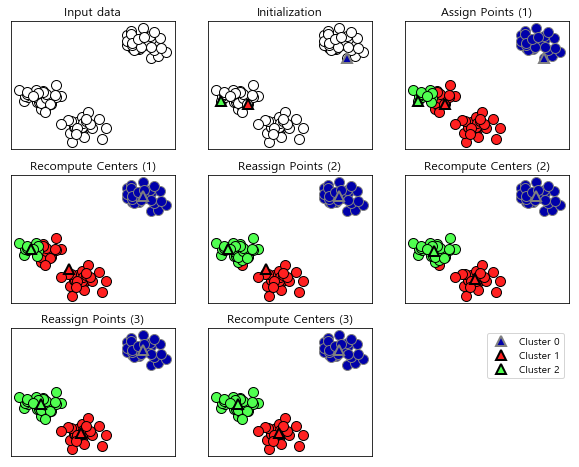

In [2]:
mglearn.plots.plot_kmeans_algorithm()

-> 입력 데이터와 k-평균 군집 알고리즘이 세 번 진행되기까지의 과정

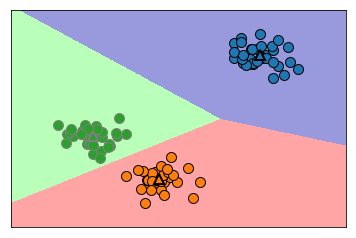

In [3]:
mglearn.plots.plot_kmeans_boundaries()

-> k-평균 알고리즘으로 찾은 클러스터 중심과 클러스터 경계

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적으로 2차원 데이터를 생성합니다.
X, y = make_blobs(random_state=1)

# 군집 모델을 만듭니다.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
print("클러스터 레이블:\n{}".format(kmeans.labels_))

클러스터 레이블:
[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


In [6]:
print(kmeans.predict(X))

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


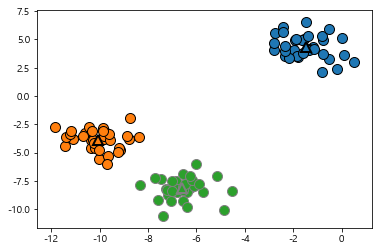

In [7]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)

-> k-평균 알고리즘으로 찾은 세 개의 클러스터 중심과 클러스터 할당

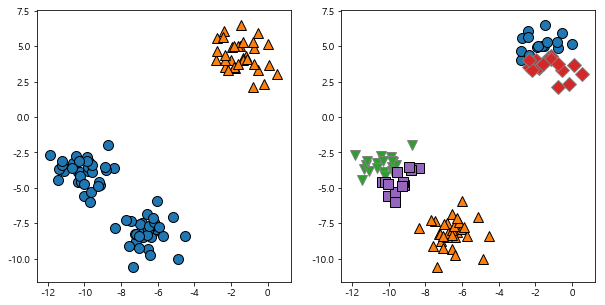

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 두 개의 클러스터 중심을 사용합니다.
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])
# 다섯 개의 클러스터 중심을 사용합니다.
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

-> k-평균 알고리즘으로 클러스터를 두 개 사용했을 때(왼쪽)와 다섯 개 사용했을 때(오른쪽)의 클러스터 할당

### k-평균 알고리즘이 실패하는 경우

- k-평균은 모든 클러스터의 반경이 똑같다고 가정하기 때문에 클러스터 중심 사이의 정확히 중간에 경계를 그림.

Text(0,0.5,'특성 1')

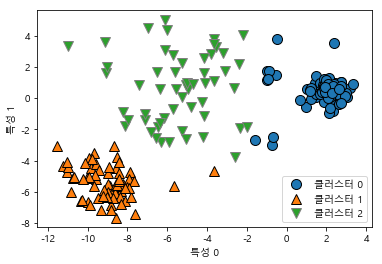

In [9]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc='best')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

-> 클러스터의 밀도가 다를 때 k-평균으로 찾은 클러스터 할당

Text(0,0.5,'특성 1')

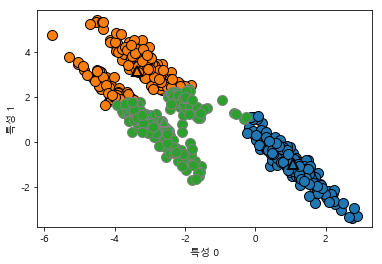

In [10]:
# 무작위로 클러스터 데이터를 생성합니다.
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경합니다.
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# 클러스터 할당과 클러스터 중심을 나타냅니다.
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

-> 원형이 아닌 클러스터를 구분하지 못하는 k-평균 알고리즘

Text(0,0.5,'특성 1')

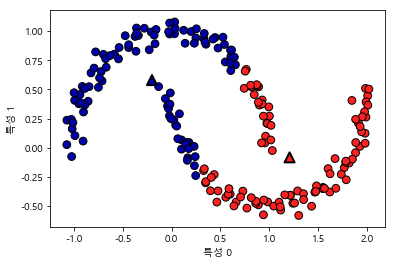

In [11]:
# two_moons 데이터를 생성합니다(이번에는 노이즈를 조금만 넣습니다).
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 두 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다.
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 표시합니다.
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=-2, edgecolors='k')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

-> 복잡한 모양의 클러스터를 구분하지 못하는 k-평균 알고리즘

### 벡터 양자화 또는 분해 메서드로서의 k-평균

In [12]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


Text(0,0.5,'nmf')

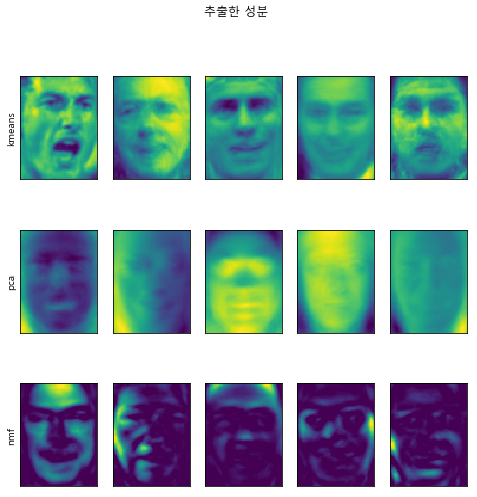

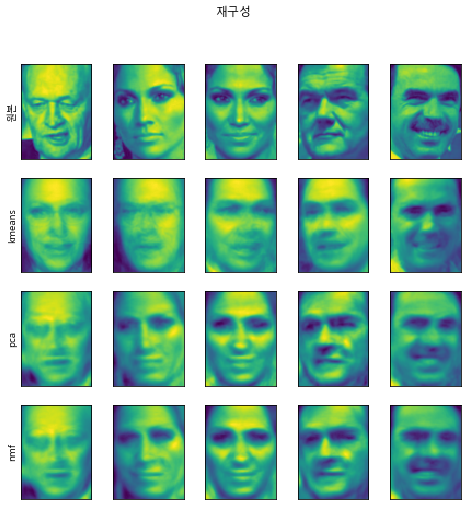

In [14]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8),
                        subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("추출한 성분")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))
    
axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(8,8))
fig.suptitle("재구성")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
axes[0, 0].set_ylabel("원본")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

-> 성분(또는 클러스터 중심) 100개를 사용한 k-평균, PCA, NMF의 이미지 재구성 비교(k-평균은 이미지당 하나의 클러스터 중심만 사용)
- k-평균을 사용한 벡터 양자화의 흥미로운 면은 입력 데이터의 차원보다 더 많은 클러스터를 사용해 데이터를 인코딩할 수 있다는 점이다.

클러스터 레이블:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


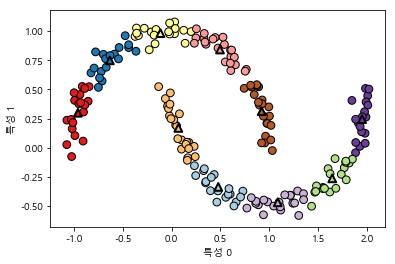

In [15]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired', edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired',
            edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")
print("클러스터 레이블:\n{}".format(y_pred))

-> 복잡한 데이터셋을 다루기 위해 많은 클러스터를 사용한 k-평균

In [16]:
distance_features = kmeans.transform(X)
print("클러스터 거리 데이터의 형태: {}".format(distance_features.shape))
print("클러스터 거리:\n{}".format(distance_features))

클러스터 거리 데이터의 형태: (200, 10)
클러스터 거리:
[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


- k-평균은 비교적 이해하기 쉽고 구현도 쉬울 뿐만 아니라 비교적 빠르기 때문에 가장 인기 있는 군집 알고리즘입니다.
- k-평균의 단점 하나는 무작위 초기화를 사용하여 알고리즘의 출력이 난수 초깃값에 따라 달라진다는 점입니다.
- k-평균의 더 큰 단점은 클러스터의 모양을 가정하고 있어서 활용 범위가 비교적 제한적이며, 찾으려 하는 클러스터의 개수를 지정해야만 한다는 것입니다.
- 다음은 이런 단점들을 개선한 두 가지 군집 알고리즘을 더 살펴보겠습니다.

## 3.5.2 병합 군집

- 병합 군집 알고리즘은 시작할 때 각 포인트를 하나의 클러스터로 지정하고, 그다음 어떤 종료 조건을 만족할 때까지 가장 비슷한 두 클러스터를 합쳐나갑니다.
- scikit-learn에서 사용하는 종료 조건은 클러스터 개수로, 지정된 개수의 클러스터가 남을 때까지 비슷한 클러스터를 합칩니다.

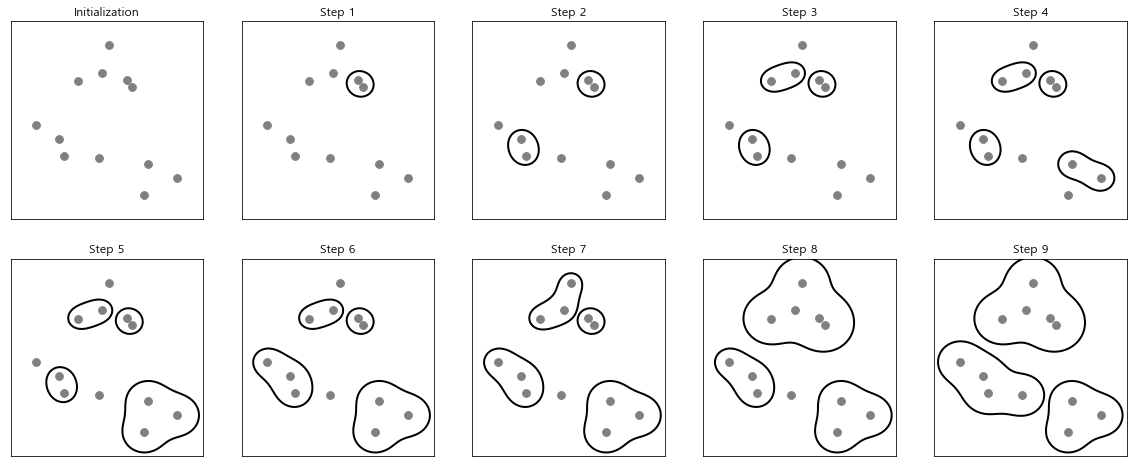

In [17]:
mglearn.plots.plot_agglomerative_algorithm()

-> 두 인접 클러스터를 반복적으로 합쳐나가는 병합 군집
- 알고리즘의 작동 특성상 병합 군집은 새로운 데이터 포인트에 대해서는 예측을 할 수 없습니다. 그러므로 병합 군집은 predict 메서드가 없습니다. 대신 훈련 세트로 모델을 만들고 클러스터 소속 정보를 얻기 위해서 fit_predict 메서드를 사용합니다.

Text(0,0.5,'특성 1')

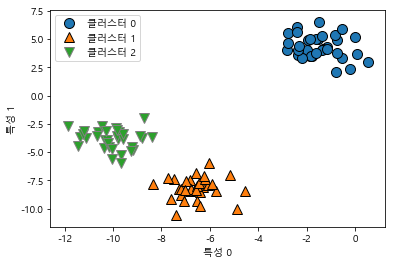

In [18]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc="best")
plt.xlabel("특성 0")
plt.ylabel("특성 1")

-> 병합 군집을 사용한 세 개의 클러스터 할당

### 계층적 군집과 덴드로그램

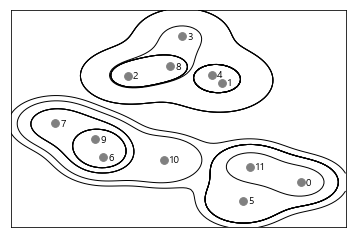

In [19]:
mglearn.plots.plot_agglomerative()

-> 병합 군집으로 생성한 계층적 군집(실선으로 표시)과 번호가 매겨진 데이터 포인트

Text(0,0.5,'클러스터 거리')

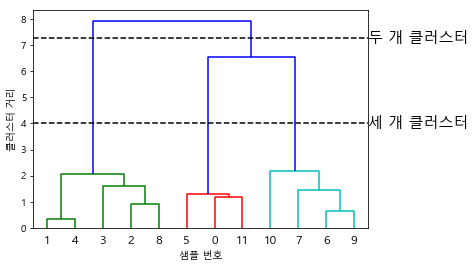

In [20]:
#SciPy에서 ward 군집 함수와 덴드로그램 함수를 임포트합니다.
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
# 데이터 배열 X에 ward 함수를 적용합니다.
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된 거리 정보가 담긴 배열을 반환합니다.
linkage_array = ward(X)
# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램을 그립니다.
dendrogram(linkage_array)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시합니다.
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, '두 개 클러스터', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, '세 개 클러스터', va='center', fontdict={'size': 15})
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")

-> 이전 그림에 있는 클러스터의 덴드로그램과 두 개의 클러스터와 세 개의 클러스터를 구분하는 점선
- 덴드로그램의 y축이 단순히 병합 알고리즘에서 두 클러스터가 합쳐질 때를 나타내는 것만은 아닙니다. 
- 가지의 길이는 합쳐진 클러스터가 얼마나 멀리 떨어져 있는지를 보여줍니다.
- 그렇지만 병합 군집은 two_moons 데이터셋과 같은 복잡한 형상을 구분하지 못합니다.
- 하지만 다음에 볼 알고리즘인 DBSCAN은 이런 문제가 없습니다.

## 3.5.2 DBSCAN
- DBSCAN(density-based spatial clustering of applications with noise)은 아주 유용한 군집 알고리즘이다.
- 주요 장점은 클러스터의 개수를 미리 지정할 필요가 없다는 점이다.
- 병합 군집이나 k-평균보다는 다소 느리지만 비교적 큰 데이터셋에도 적용할 수 있음.
- DBSCAN의 아이디어는 데이터의 밀집 지역이 한 클러스터를 구성하며 비교적 비어있는 지역을 경계로 다른 클러스터와 구분된다는 것임.
- 밀집 지역에 있는 포인트를 핵심 샘플이라고 하며 다음과 같이 정의한다.
- 두 개의 매개변수 min_samples와 eps가 있고, 한 데이터 포인트에서 eps 거리 안에 데이터가 min_samples 개수만큼 들어 있으면 이 데이터 포인트를 핵심 샘플로 분류함. eps보다 가까운 핵심 샘플은 DBSCAN에 의해 동일한 클러스터로 합쳐짐.
- 알고리즘의 중요한 포인트에는 핵심 포인트, 경계 포인트, 잡음 포인트가 있음.
- 병합 군집에 사용했던 데이터셋에 DBSCAN을 적용해보자.

In [24]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN() # eps와 min_samples 기본값
clusters = dbscan.fit_predict(X) # 모든 포인트가 잡음 포인트로 할당됨.
print("클러스터 레이블:\n{}".format(clusters))

클러스터 레이블:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


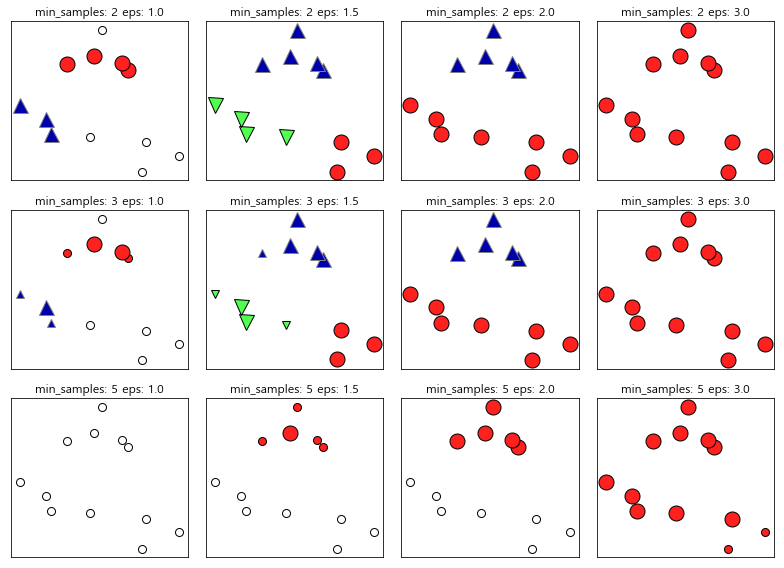

In [23]:
mglearn.plots.plot_dbscan()

-> min_samples와 eps 매개변수를 바꿔가며 DBSCAN으로 계산한 클러스터 할당
- eps를 증가시키면 하나의 클러스터에 더 많은 포인트가 포함됩니다.
- min_samples를 키우면 핵심 포인트 수가 줄어들며 잡음 포인트가 늘어납니다.

Text(0,0.5,'특성 1')

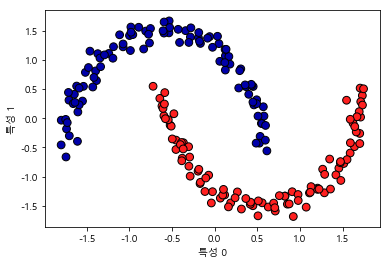

In [26]:
from sklearn.preprocessing import StandardScaler
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다.
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# 클러스터 할당을 표시합니다.
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

-> 기본값 eps=0.5를 사용해 DBSCAN으로 찾은 클러스터 할당

## 3.5.4 군집 알고리즘의 비교적 평가
- 군집 알고리즘을 적용하는 데 어려운 점 하나는 알고리즘이 잘 작동하는지 평가하거나 여러 알고리즘의 출력을 비교하기가 매우 어렵다는 것이다.
- 군집 알고리즘의 평가에 대해 이야기한 후 실제 데이터셋을 이용해 k-평균, 병합 군집, DBSCAN 알고리즘을 비교해보겠습니다.

### 타깃값으로 군집 평가하기
- 군집 알고리즘의 결과를 실제 정답 클러스터와 비교하여 평가할 수 있는 지표들(ARI와 NMI)이 있음.

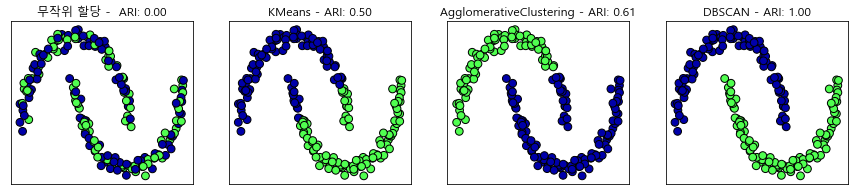

In [30]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다.
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                        subplot_kw={'xticks': (), 'yticks': ()})

# 사용할 알고리즘 모델을 리스트로 만듭니다.
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# 비교를 위해 무작위로 클러스터를 할당합니다.
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위로 할당한 클러스터를 그립니다.
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("무작위 할당 -  ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # 클러스터 할당과 클러스터 중심을 그립니다.
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,adjusted_rand_score(y, clusters)))

-> two_moons 데이터셋에 적용한 무작위 할당, k-평균, 병합 군집, DBSCAN의 ARI 점수 비교

In [31]:
from sklearn.metrics import accuracy_score

# 포인트가 클러스터로 나뉜 두 가지 경우
cluster1 = [0, 0, 1, 1, 0]
cluster2 = [1, 1, 0, 0, 1]
# 모든 레이블이 달라졌으므로 정확도는 0입니다.
print("정확도: {:.2f}".format(accuracy_score(cluster1, cluster2)))
# 같은 포인트가 한 클러스터에 모였으므로 ARI는 1입니다.
print("ARI: {:.2f}".format(adjusted_rand_score(cluster1, cluster2)))

정확도: 0.00
ARI: 1.00


### 타깃값 없이 군집 평가하기

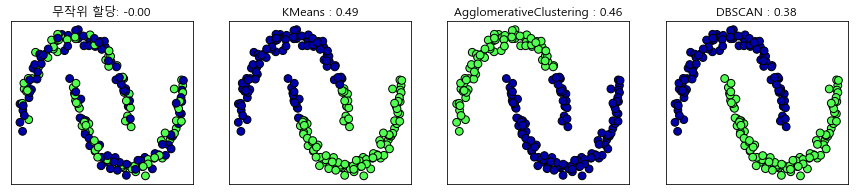

In [33]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다.
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15,3), subplot_kw={'xticks': (), 'yticks': ()})

# 비교를 위해 무작위로 클러스터를 할당합니다.
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위로 할당한 클러스터를 그립니다.
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("무작위 할당: {:.2f}".format(silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # 클러스터 할당과 클러스터 중심을 그립니다.
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,silhouette_score(X_scaled, clusters)))

-> two_moons 데이터셋에 적용한 무작위 할당. 병합 군집, DBSCAN의 실루엣 점수 비교, 더 나은 군집을 만든 DBSCAN의 실루엣 점수가 k-평균보다 낮음

### 얼굴 데이터셋으로 군집 알고리즘 비교